In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)
from sklearn.model_selection import train_test_split

sns.set()

# Bagging, Random Forest y Boosting

En el ámbito del aprendizaje automático, Bagging, Random Forest y Boosting son técnicas fundamentales que se utilizan para mejorar la precisión y robustez de los modelos predictivos. Estas metodologías se centran en el concepto de combinación de múltiples modelos de aprendizaje para reducir la variabilidad y mejorar la generalización en la predicción de datos. 

- Bagging se basa en el entrenamiento de múltiples modelos en conjuntos de datos re-muestrados.
- Random Forest combina múltiples árboles de decisión para obtener una predicción más precisa
- Boosting secuencialmente fortalece un modelo débil mediante la ponderación de los errores de predicción. 

En este contexto, exploraremos estas técnicas, y para simplificar el análisis usaremos siempre modelos de arboles.

## California Housing Prices

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

No vamos a realizar la exploración de los datos para ir directamente al modelado. Se deja al alumno esta parte, aunque probablemente ya lo haya hecho en Inteligencia Artificial. Para arrancar vamos a tomar dos modelos y ver su predicción, como métrica comparativa.

In [2]:
from sklearn.preprocessing import StandardScaler

# Cargamos el dataset California Housing Prices
california_data = fetch_california_housing()

X = california_data.data
y = california_data.target

# Separamos el dataset
X_train, X_test, y_train, y_test = train_test_split(california_data.data, california_data.target, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Entrenamos la regresión lineal
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_linear = linear_regressor.predict(X_test)

metrics_linear = {
    "name": "Regresión lineal",
    "MAE_training": mean_absolute_error(y_train, linear_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_linear),
    "RMSE": root_mean_squared_error(y_test, y_pred_linear),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_linear),    
    "R2": r2_score(y_test, y_pred_linear)
}

metrics_linear

{'name': 'Regresión lineal',
 'MAE_training': 0.5286283596582394,
 'MAE': 0.5332001304956996,
 'RMSE': 0.745581383012775,
 'MAPE': 0.31952187413621774,
 'R2': 0.5757877060324523}

In [5]:
# Entrenamos el arbol de regresión
tree_regressor = DecisionTreeRegressor(splitter='best', max_depth=13, min_samples_split=2,
                                       min_samples_leaf=16, random_state=42)

tree_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_tree = tree_regressor.predict(X_test)

metrics_tree = {
    "name": "Arbol de regresión",
    "MAE_training": mean_absolute_error(y_train, tree_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_tree),
    "RMSE": root_mean_squared_error(y_test, y_pred_tree),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_tree),    
    "R2": r2_score(y_test, y_pred_tree)
}

metrics_tree

{'name': 'Arbol de regresión',
 'MAE_training': 0.32841050485139817,
 'MAE': 0.40261761222892817,
 'RMSE': 0.5959436899267222,
 'MAPE': 0.23070061574761228,
 'R2': 0.7289785956440629}

## Bagging

Empezamos con nuestro primer modelo de ensamble usando bagging. En esta técnica, creamos múltiples instancias del mismo modelo base, en este caso, árboles de regresión, pero los entrenamos en diferentes conjuntos de datos de entrenamiento generados aleatoriamente a partir del conjunto de datos de entrenamiento original mediante el muestreo con reemplazo. Luego, combinamos las predicciones de estos modelos mediante promediado (en el caso de regresión) o votación (en el caso de clasificación) para obtener una predicción final. 

Esto ayuda a reducir la varianza del modelo, buscando mejorar su capacidad de generalización.

En Scikit-Learn, tenemos la clase [BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) para armar este modelo.

In [6]:
from sklearn.ensemble import BaggingRegressor

# Creamos un Bagging con 20 estimadores (20 árboles)
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=20, random_state=42, n_jobs=-1)
bagging_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_bag = bagging_regressor.predict(X_test)

metrics_bag = {
    "name": "Bagging",
    "MAE_training": mean_absolute_error(y_train, bagging_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_bag),
    "RMSE": root_mean_squared_error(y_test, y_pred_bag),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_bag),    
    "R2": r2_score(y_test, y_pred_bag)
}

metrics_bag

{'name': 'Bagging',
 'MAE_training': 0.1307028023861434,
 'MAE': 0.337156480741279,
 'RMSE': 0.5150048840102535,
 'MAPE': 0.19389227325587863,
 'R2': 0.7975975172953556}

In [7]:
metrics = pd.DataFrame([metrics_linear, metrics_tree, metrics_bag])
metrics.sort_values(by=['MAE'], ascending=True)

,name,MAE_training,MAE,RMSE,MAPE,R2
2,Bagging,0.130703,0.337156,0.515005,0.193892,0.797598
1,Arbol de regresión,0.328411,0.402618,0.595944,0.230701,0.728979
0,Regresión lineal,0.528628,0.533200,0.745581,0.319522,0.575788


Aquí vemos un efecto positivo de usar Bagging, el cual mejora en un 37% con respecto a la regresión lineal y un 17% con solo un arbol.

## Random Forest

Continuamos nuestra exploración con Random Forest, una técnica de ensamblado que se basa en la construcción de múltiples árboles de decisión durante el proceso de entrenamiento. Al igual que en Bagging, utilizamos árboles de regresión como nuestro modelo base. Sin embargo, en Random Forest, cada árbol se entrena en un subconjunto aleatorio de características seleccionadas al azar del conjunto de datos de entrenamiento. Además, se introduce aleatoriedad en la selección de muestras durante la construcción de cada árbol, lo que aumenta la diversidad entre los árboles individuales. Luego, las predicciones de todos los árboles se combinan mediante promediado para obtener una predicción final. Esta técnica ayuda a reducir aún más la correlación entre los árboles y proporciona una mejor generalización.

En Scikit-Learn, tenemos la clase [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html):

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Creamos un bosque aleatorio por defecto (100 árboles)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_rf = rf_regressor.predict(X_test)

metrics_rf = {
    "name": "Random Forest",
    "MAE_training": mean_absolute_error(y_train, rf_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": root_mean_squared_error(y_test, y_pred_rf),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_rf),    
    "R2": r2_score(y_test, y_pred_rf)
}

In [9]:
metrics = pd.DataFrame([metrics_linear, metrics_tree, metrics_bag, metrics_rf])
metrics.sort_values(by=['MAE'], ascending=True)

,name,MAE_training,MAE,RMSE,MAPE,R2
3,Random Forest,0.122146,0.327599,0.505694,0.189374,0.804850
2,Bagging,0.130703,0.337156,0.515005,0.193892,0.797598
1,Arbol de regresión,0.328411,0.402618,0.595944,0.230701,0.728979
0,Regresión lineal,0.528628,0.533200,0.745581,0.319522,0.575788


Vemos que mejoramos la métrica, aunque estamos en el mismo orden que Bagging.

## Boosting

Ahora veamos Boosting, con AdaBoost como punto de partida. En AdaBoost, también conocido como Adaptive Boosting, se utiliza un conjunto de modelos base, inicialmente débiles, como árboles de regresión. Cada modelo se ajusta secuencialmente a los datos, con un énfasis adicional en las instancias mal clasificadas en el conjunto de entrenamiento anterior. Esto se logra asignando pesos a cada instancia, donde las instancias mal clasificadas reciben pesos más altos para que los modelos posteriores se concentren más en ellas. Luego, las predicciones de todos los modelos se combinan ponderadamente para obtener una predicción final, donde los modelos con un mejor desempeño tienen un mayor peso en la predicción. 

In [10]:
from sklearn.ensemble import AdaBoostRegressor

# Inicializamos el árbol (weak learner)
base_estimator = DecisionTreeRegressor(max_depth=6)

# Configuramos también la cantidad y la constante de aprendizaje
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=500, random_state=42, learning_rate=0.01)
adaboost_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_ada = adaboost_regressor.predict(X_test)

metrics_ada = {
    "name": "AdaBoost",
    "MAE_training": mean_absolute_error(y_train, adaboost_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_ada),
    "RMSE": root_mean_squared_error(y_test, y_pred_ada),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_ada),    
    "R2": r2_score(y_test, y_pred_ada)
}

In [11]:
metrics = pd.DataFrame([metrics_linear, metrics_tree, metrics_bag, metrics_rf, metrics_ada])
metrics.sort_values(by=['MAE'], ascending=True)

,name,MAE_training,MAE,RMSE,MAPE,R2
3,Random Forest,0.122146,0.327599,0.505694,0.189374,0.804850
2,Bagging,0.130703,0.337156,0.515005,0.193892,0.797598
1,Arbol de regresión,0.328411,0.402618,0.595944,0.230701,0.728979
4,AdaBoost,0.441896,0.461125,0.625504,0.308822,0.701425
0,Regresión lineal,0.528628,0.533200,0.745581,0.319522,0.575788


Vemos que el resultado fue bastante malo. Esto es la evidencia de lo poco que es usa AdaBoost, sumado a que quizas trabajando más con los parámetros se podria mejorar, pero en vez de eso podemos pasar a una implementación más avanzada.

### XGBoost

XGBoost es una implementación avanzada de Boosting, que utiliza árboles de decisión como modelos base y emplea técnicas como la regularización y la poda para mejorar aún más la capacidad de generalización del modelo y la eficiencia computacional. XGBoost se ha convertido en una opción popular debido a su rendimiento superior en una variedad de problemas.

Para ello debemos instalar la libreria [XGBoost](https://xgboost.readthedocs.io/en/stable/), usando el gestor de paquetes de preferencia, tales como:

```bash
conda install conda-forge::xgboost
``` 

```bash
pip install xgboost
``` 

```bash
poetry add xgboost
``` 

In [12]:
import xgboost as xgb

# Inicializamos XGBoost con sus hiperparámetros por defecto
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_xgb = xgb_regressor.predict(X_test)

metrics_xgb = {
    "name": "XGBoost",
    "MAE_training": mean_absolute_error(y_train, xgb_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": root_mean_squared_error(y_test, y_pred_xgb),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_xgb),    
    "R2": r2_score(y_test, y_pred_xgb)
}

In [13]:
metrics = pd.DataFrame([metrics_linear, metrics_tree, metrics_bag, metrics_rf, metrics_ada, metrics_xgb])
metrics.sort_values(by=['MAE'], ascending=True)

,name,MAE_training,MAE,RMSE,MAPE,R2
5,XGBoost,0.192576,0.309573,0.471794,0.178295,0.830137
3,Random Forest,0.122146,0.327599,0.505694,0.189374,0.804850
2,Bagging,0.130703,0.337156,0.515005,0.193892,0.797598
1,Arbol de regresión,0.328411,0.402618,0.595944,0.230701,0.728979
4,AdaBoost,0.441896,0.461125,0.625504,0.308822,0.701425
0,Regresión lineal,0.528628,0.533200,0.745581,0.319522,0.575788


Como vemos el mejor modelo fue XGBoost, con muy cerca los bosques aleatorios. Si se observa una mejora sustancial con respecto a los modelos más simples. 

Por último, lo interesante de estos métodos de ensamble es que nos ofrecen formas de ver la importancia de los diferentes atributos y nos dan explicabilidad juntos a buenos resultados.

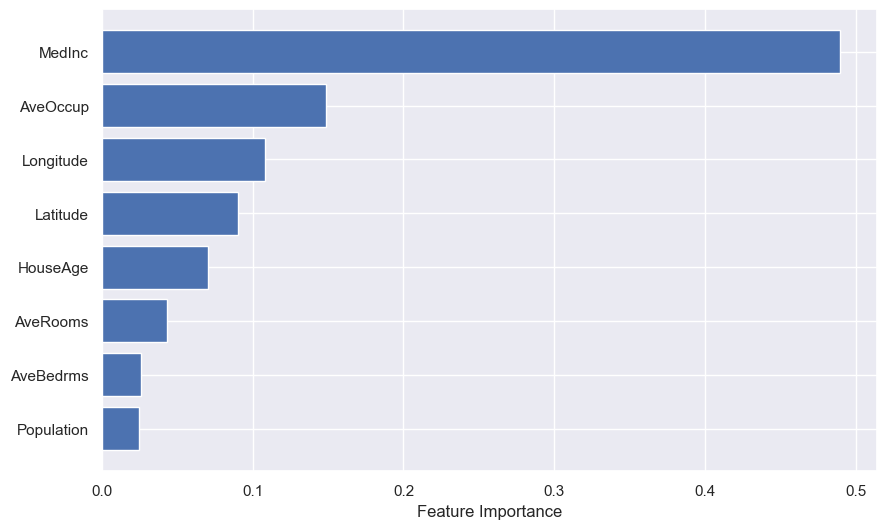

In [14]:
# Obtenemos la importancia de características
feature_importances = xgb_regressor.feature_importances_
feature_names = california_data.feature_names

# Ordenamos los índices
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

Aquí nos indica que lo que definen principalmente el precio en california es el ingreso medio en el bloque, el número promedio de personas por casa y la ubicación.